# Step 3: Descriptive Analytics

In [1]:
# ---------------------------------------
# 📦 BLOCK 1: Import Libraries
# ---------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [9]:
# ---------------------------------------
# 📥 BLOCK 2: Melt and Merge temperature.csv + energy.csv
# ---------------------------------------

# 🔹 Reshape temperature data from wide → long format
temp_melted = temp_df.melt(
    id_vars=['State'],                    # Keep 'State' as is
    var_name='Month',                     # Convert month columns into 'Month'
    value_name='Temperature'              # Assign values to 'Temperature'
)

# 🔹 Reshape energy data from wide → long format
energy_melted = energy_df.melt(
    id_vars=['State'],                    # Keep 'State' as is
    var_name='Month',                     # Convert month columns into 'Month'
    value_name='Energy_Consumption'       # Assign values to 'Energy_Consumption'
)

# 🔁 Merge both melted DataFrames on 'State' and 'Month'
merged_df = pd.merge(
    temp_melted,
    energy_melted,
    on=['State', 'Month'],
    how='inner'
)

# ❌ Remove aggregate row for United States to avoid bias
merged_df = merged_df[merged_df['State'] != 'United States']

# 👀 Preview merged result
print("✅ Merged data:")
display(merged_df.head())


✅ Merged data:


,State,Month,Temperature,Energy_Consumption
0,Alaska,Jan-24,25,228
1,Arizona,Jan-24,73,2748
2,California,Jan-24,77,7549
3,Connecticut,Jan-24,55,1276
4,Florida,Jan-24,87,10196


In [6]:
# ---------------------------------------
# 🧹 BLOCK 3: Clean Missing Values
# ---------------------------------------

# Check for missing values
print("🧼 Missing values per column:")
print(merged_df.isnull().sum())

# Drop rows with missing values
merged_df.dropna(inplace=True)

# Confirm shape
print(f"✅ Cleaned dataset shape: {merged_df.shape}")


🧼 Missing values per column:
State                 0
Month                 0
Temperature           0
Energy_Consumption    0
dtype: int64
✅ Cleaned dataset shape: (288, 4)


In [14]:
# ---------------------------------------
# 🔧 BLOCK 4: Feature Engineering
# ---------------------------------------

# Add Cooling Degree Days (CDD)
merged_df['CDD'] = merged_df['Temperature'].apply(lambda x: max(0, x - 65))

# Log-transform energy to reduce skew
merged_df['Log_Energy'] = np.log(merged_df['Energy_Consumption'] + 1)


In [16]:
display(merged_df[['Temperature', 'Energy_Consumption', 'CDD', 'Log_Energy']].head())


,Temperature,Energy_Consumption,CDD,Log_Energy
0,25,228,0,5.433722
1,73,2748,8,7.918992
2,77,7549,12,8.929303
3,55,1276,0,7.152269
4,87,10196,22,9.229849


In [10]:
# ---------------------------------------
# 📊 BLOCK 5.1: Summary Statistics
# ---------------------------------------

# 🧾 View basic descriptive statistics for core numeric features
print("📌 Summary Statistics:")
print(merged_df[['Temperature', 'Energy_Consumption']].describe())


📌 Summary Statistics:
       Energy_Consumption
count          288.000000
mean          3312.996528
std           3494.037022
min            140.000000
25%           1013.500000
50%           2318.000000
75%           4073.250000
max          20201.000000


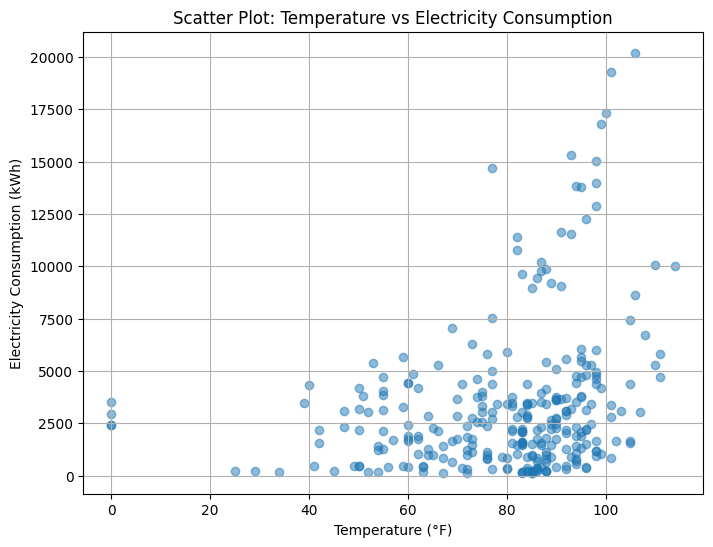

In [11]:
# ---------------------------------------
# 🔵 BLOCK 5.2: Scatter Plot – Temperature vs. Energy Consumption
# ---------------------------------------

plt.figure(figsize=(8,6))
plt.scatter(
    merged_df['Temperature'],
    merged_df['Energy_Consumption'],
    alpha=0.5
)
plt.title('Scatter Plot: Temperature vs Electricity Consumption')
plt.xlabel('Temperature (°F)')
plt.ylabel('Electricity Consumption (kWh)')
plt.grid(True)
plt.show()


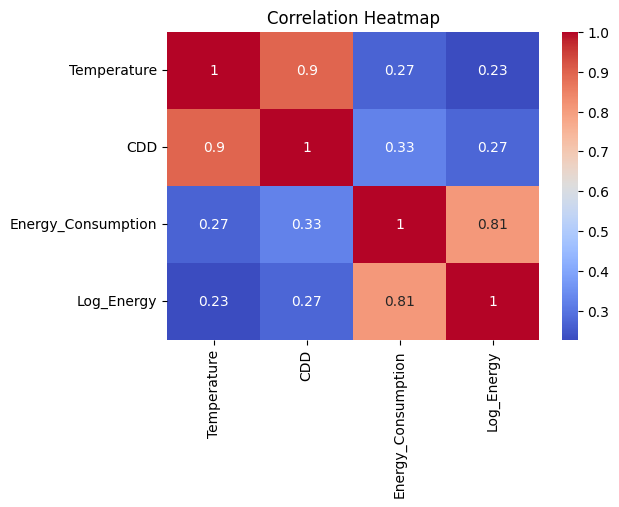

In [17]:
# ---------------------------------------
# 🔴 BLOCK 5.3: Correlation Heatmap
# ---------------------------------------

# 📈 Visualize pairwise correlations between engineered numeric features
plt.figure(figsize=(6, 4))
sns.heatmap(
    merged_df[['Temperature', 'CDD', 'Energy_Consumption', 'Log_Energy']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Correlation Heatmap')
plt.show()


*– The p-value is smaller than 0.05, therefore, the two variables are
correlated*

# Step 4: Predictive Analytics

**Response Variable**

*Electricity Consumption (kWh)*

**Response Variable**

*Average Temperature (°F)*

In [18]:
# ---------------------------------------
# 🔷 BLOCK 6: Simple Linear Regression
# ---------------------------------------

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 🔹 Define features and target variable
X = merged_df[['Temperature']]  # Independent variable
y = merged_df['Energy_Consumption']  # Dependent variable

# 🔹 Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 🔹 Make predictions on the test set
y_pred = model.predict(X_test)

# 🔹 Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Model Coefficient (Slope): {model.coef_[0]:.2f}")
print(f"Model Intercept: {model.intercept_:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")


Model Coefficient (Slope): 49.55
Model Intercept: -499.05
R² Score: 0.0199
Mean Squared Error: 12535445.71


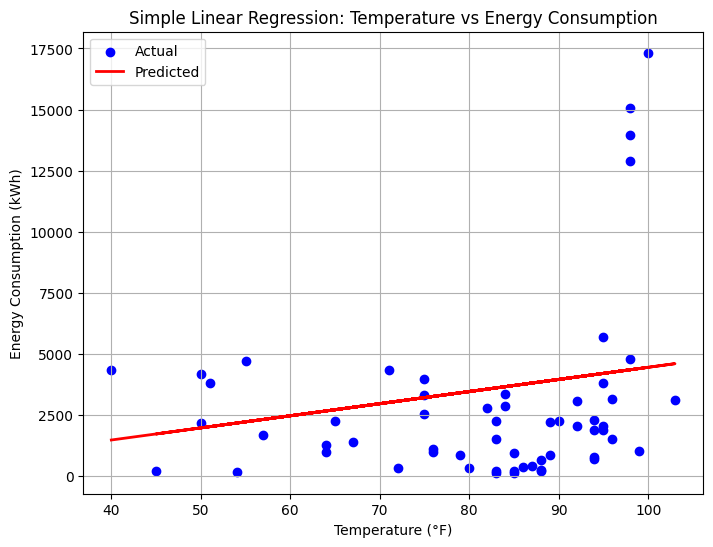

In [19]:
# ---------------------------------------
# 📈 Visualization: Regression Line
# ---------------------------------------

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Simple Linear Regression: Temperature vs Energy Consumption')
plt.xlabel('Temperature (°F)')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.grid(True)
plt.show()


# Step 5: Intermediate - Feature Engineering (Cooling Degree Days)

In [20]:
# ---------------------------------------
# 🔷 BLOCK 7: Multiple Linear Regression
# ---------------------------------------

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 🔹 Define features and target variable
X = merged_df[['Temperature', 'CDD']]  # Independent variables
y = merged_df['Energy_Consumption']    # Dependent variable

# 🔹 Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Create and train the Multiple Linear Regression model
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

# 🔹 Make predictions on the test set
y_pred = mlr_model.predict(X_test)

# 🔹 Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Model Coefficients: {mlr_model.coef_}")
print(f"Model Intercept: {mlr_model.intercept_:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")


Model Coefficients: [ -9.63056106 102.17433835]
Model Intercept: 2393.93
R² Score: 0.0709
Mean Squared Error: 11882117.11


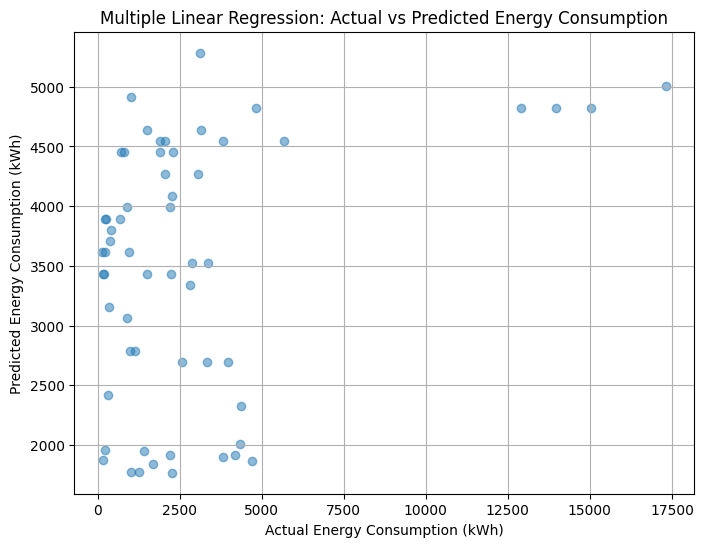

In [21]:
# ---------------------------------------
# 📈 Visualization: Actual vs Predicted
# ---------------------------------------

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Multiple Linear Regression: Actual vs Predicted Energy Consumption')
plt.xlabel('Actual Energy Consumption (kWh)')
plt.ylabel('Predicted Energy Consumption (kWh)')
plt.grid(True)
plt.show()


*Boxplots by State to explore energy usage distribution.*

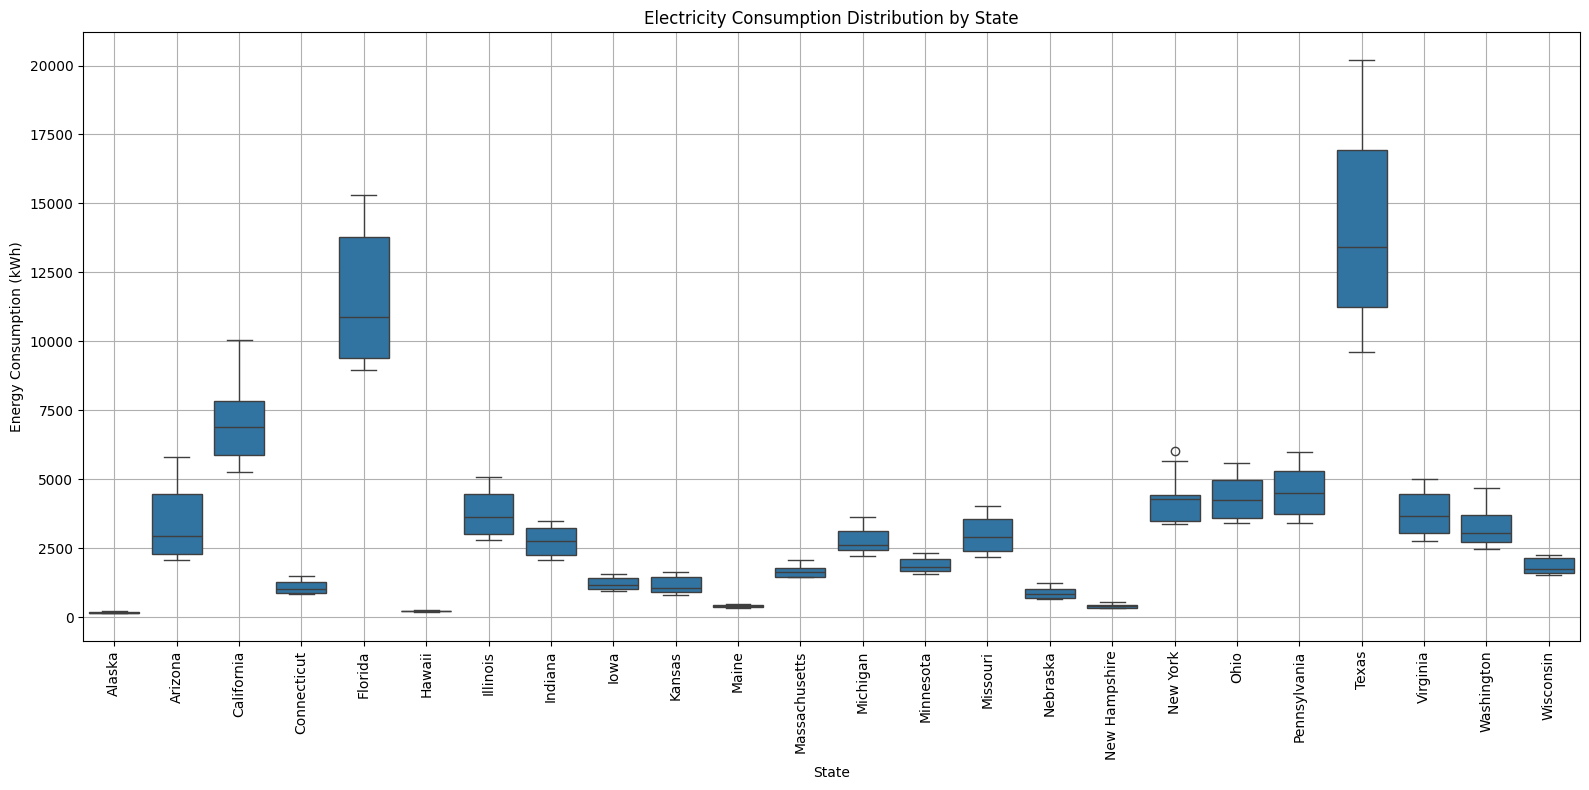

In [22]:
# ---------------------------------------
# 📉 BLOCK 9.1: Boxplot – Energy Consumption by State
# ---------------------------------------

plt.figure(figsize=(16, 8))
sns.boxplot(x='State', y='Energy_Consumption', data=merged_df)
plt.xticks(rotation=90)
plt.title('Electricity Consumption Distribution by State')
plt.ylabel('Energy Consumption (kWh)')
plt.xlabel('State')
plt.grid(True)
plt.tight_layout()
plt.show()


*State-by-Month Barchart of Electricity Consumption.*

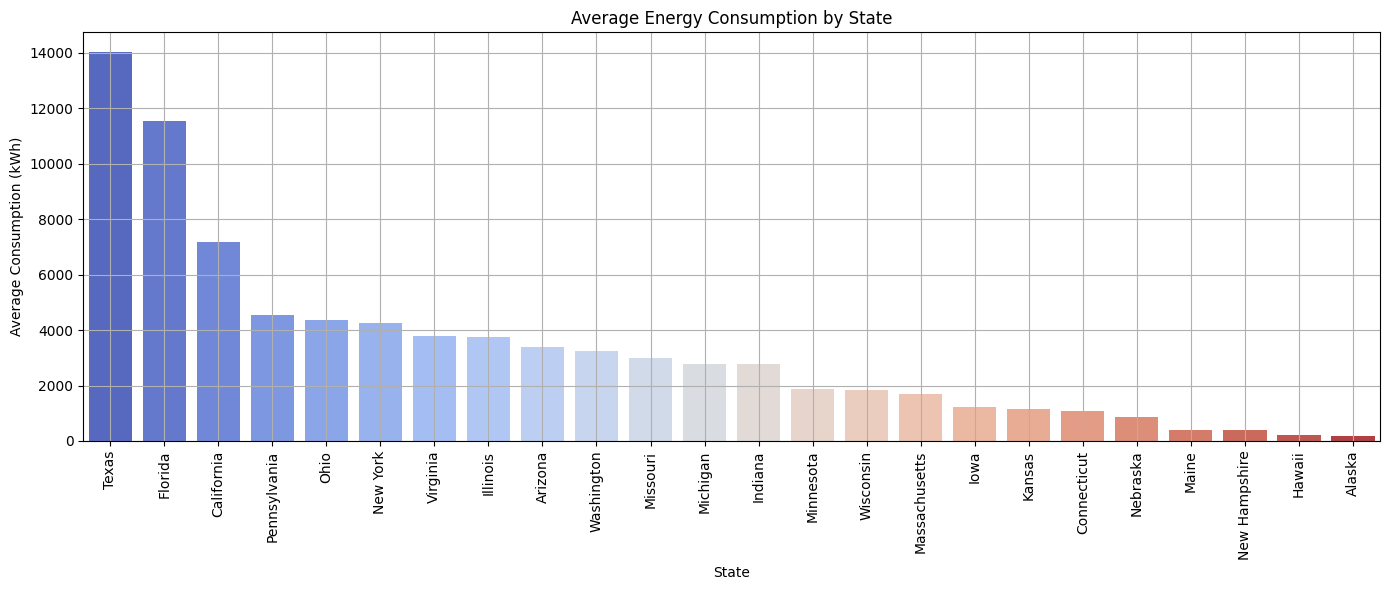

In [23]:
# ---------------------------------------
# 📊 BLOCK 9.2: Bar Chart – Average Consumption by State
# ---------------------------------------

state_avg = merged_df.groupby('State')['Energy_Consumption'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x=state_avg.index, y=state_avg.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Average Energy Consumption by State')
plt.ylabel('Average Consumption (kWh)')
plt.xlabel('State')
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
# ---------------------------------------
# 🚧 BLOCK 10: Challenges & Limitations
# ---------------------------------------

print("""
⚠️ Challenges Faced:

• Merging two datasets with different structures and time spans
• Cleaning inconsistent or missing data (especially per-state records)
• Outliers in energy consumption data skewing results
• R² values were lower than expected → other factors likely missing
• Only linear models used — may not capture complex patterns

🔜 Potential Improvements:

• Add features like population, insulation, or income
• Use nonlinear or tree-based models (e.g., Random Forest)
• Train on multi-year datasets to capture seasonal trends
""")



⚠️ Challenges Faced:

• Merging two datasets with different structures and time spans
• Cleaning inconsistent or missing data (especially per-state records)
• Outliers in energy consumption data skewing results
• R² values were lower than expected → other factors likely missing
• Only linear models used — may not capture complex patterns

🔜 Potential Improvements:

• Add features like population, insulation, or income
• Use nonlinear or tree-based models (e.g., Random Forest)
• Train on multi-year datasets to capture seasonal trends



# Step 6: Advanced - Model Evaluation

In [26]:
# ---------------------------------------
# 🧪 BLOCK 11: Advanced Model Evaluation – Residuals
# ---------------------------------------

import scipy.stats as stats

# ✅ Rebuild full X input for multiple regression (must match training!)
X_full = merged_df[['Temperature', 'CDD']]
y_full = merged_df['Energy_Consumption']

# 🔹 Predict and calculate residuals
y_pred = mlr_model.predict(X_full)
residuals = y_full - y_pred


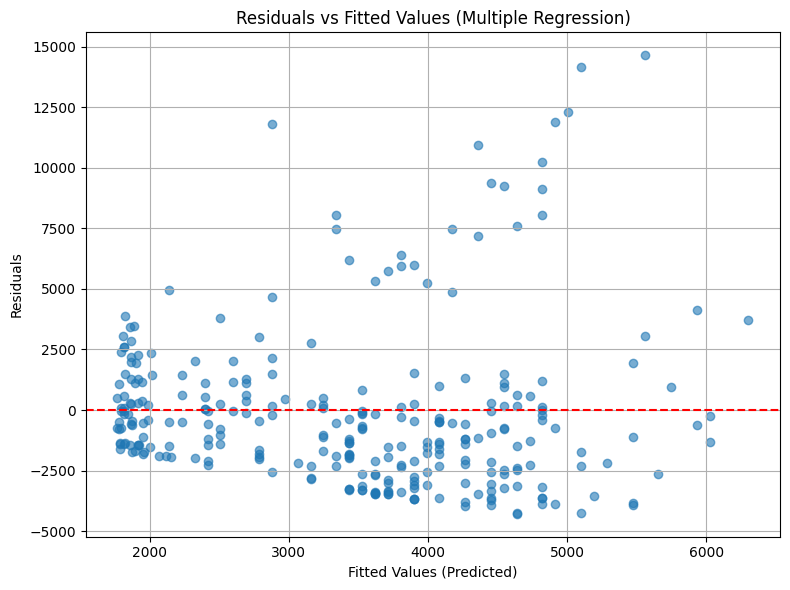

In [27]:
# ---------------------------------------
# 🔷 BLOCK 11.1: Residuals vs Fitted Values
# ---------------------------------------

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values (Multiple Regression)')
plt.xlabel('Fitted Values (Predicted)')
plt.ylabel('Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()


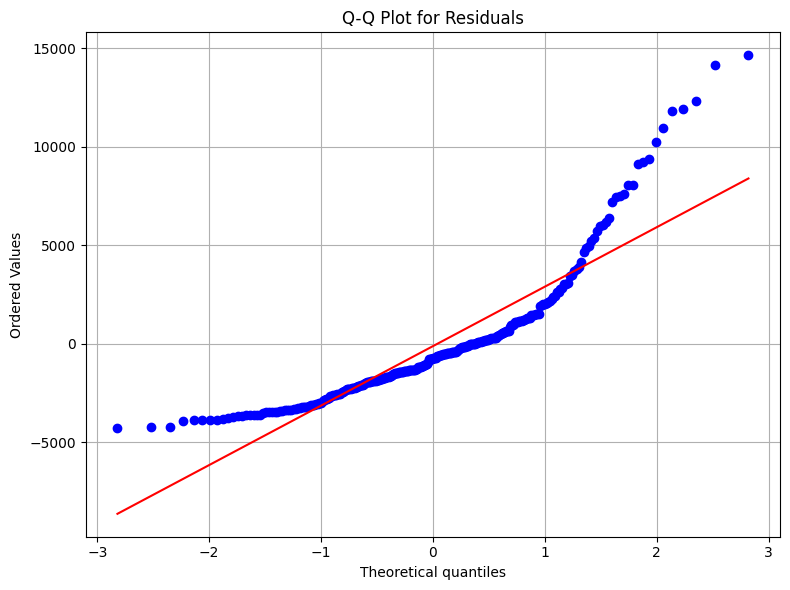

In [28]:
# ---------------------------------------
# 🔷 BLOCK 11.2: Q-Q Plot for Residuals
# ---------------------------------------

plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot for Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()
